<font size = 7>Hands-on Activity 8.1: Aggregating Data with Pandas</font>

<font size =5 >CPE311 Computational Thinking with Python </font>
 <br>
 Name: Anduque, Kurt Gabriel
 <br>
 Section: CPE22S3
 <br>
 Performed on: 04/05/2025
 <br>
 Submitted on: 04/05/2025
 <br>
 Submitted to: Engr. Roman M. Richard

<font size = 5><b>8.1.1 Intended Learning Outcomes</b></font>


After this activity, the student should be able to:
- Demonstrate querying and merging of dataframes
- Perform advanced calculations on dataframes
- Aggregate dataframes with pandas and numpy
- Work with time series data

<font size = 5><b>8.1.2 Resources</b></font>

- Computing Environment using Python 3.x
- Attached Datasets (under Instructional Materials)

<font size = 5><b>8.1.3 Procedures</b></font><br>
The procedures can be found in the canvas module. Check the following under topics:

- 8.1 Weather Data Collection
- 8.2 Querying and Merging
- 8.3 Dataframe Operations
- 8.4 Aggregations
- 8.5 Time Series

<font size = 5>8.1 Weather Data Collection</font>

<font size = 4>Collecting weather data from an API</font>

<b>About the data</b>

In this notebook, we will be collecting daily weather data from the National Centers for Environmental Information (NCEI) API. We will use the Global Historical Climatology
Network - Daily (GHCND) data set; see the documentation here.
    
Note: The NCEI is part of the National Oceanic and Atmospheric Administration (NOAA) and, as you can see from the URL for the API, this resource was created when the
NCEI was called the NCDC. Should the URL for this resource change in the future, you can search for the NCEI weather API to find the updated one.

<b>Using the NCEI API</b>

We can make a loop to query for all the data points one day at a time. Here we create a list of all the results:

In [291]:
import requests
def make_request(endpoint, payload=None):
     """
     Make a request to a specific endpoint on the weather API
     passing headers and optional payload.
    
     Parameters:
     - endpoint: The endpoint of the API you want to
     make a GET request to.
     - payload: A dictionary of data to pass along
     with the request.
    
     Returns:
     Response object.
     """
     return requests.get(f'https://www.ncdc.noaa.gov/cdo-web/api/v2/{endpoint}',headers={'token': 'FqULZglLVhoNKxDtgXTYDVDcgBzgnpGb'},
         params=payload)
params = {
    'datasetid': 'GHCND',
    'locationid': 'ZIP:28428',        # North Carolina, for example
    'startdate': '2023-01-01',
    'enddate': '2023-01-03',
    'limit': 3
}
response = make_request('data',params)
print(response.json())

{'metadata': {'resultset': {'offset': 1, 'count': 5, 'limit': 3}}, 'results': [{'date': '2023-01-01T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND:US1NCNH0062', 'attributes': ',,N,0700', 'value': 5}, {'date': '2023-01-02T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND:US1NCNH0062', 'attributes': ',,N,0700', 'value': 0}, {'date': '2023-01-02T00:00:00', 'datatype': 'SNOW', 'station': 'GHCND:US1NCNH0062', 'attributes': ',,N,0700', 'value': 0}]}


In [294]:
import pandas as pd
# Get JSON from the response
data = response.json()

# Convert just the 'results' list to a DataFrame
df = pd.DataFrame(data['results'])

df

,date,datatype,station,attributes,value
0,2023-01-01T00:00:00,PRCP,GHCND:US1NCNH0062,",,N,0700",5
1,2023-01-02T00:00:00,PRCP,GHCND:US1NCNH0062,",,N,0700",0
2,2023-01-02T00:00:00,SNOW,GHCND:US1NCNH0062,",,N,0700",0


In [359]:
df.to_csv('nyc_weather_2018.csv', index=False, encoding='utf-8')

In [361]:
import sqlite3
with sqlite3.connect('weather.db') as connection:
    df.to_sql(
    'weather', connection, index=False, if_exists='replace'
    )

In [363]:
response = make_request(
'stations',
{
'datasetid' : 'GHCND', # Global Historical Climatology Network - Daily (GHCND) dataset
'locationid' : 'CITY:US360019', # NYC
'limit' : 1000 # max allowed
}
)
stations = pd.DataFrame(response.json()['results'])[['id', 'name', 'latitude', 'longitude', 'elevation']]
stations.to_csv('weather_stations.csv', index=False)


In [364]:
with sqlite3.connect('weather.db') as connection:
    stations.to_sql(
    'stations', connection, index=False, if_exists='replace'
    )


<font size = 5>8.2 Querying and Merging</font>

<font size= 4><b>Setup</b></font>

In [339]:
import pandas as pd
# lets import the datasaet from the recent proceedure
weather = pd.read_csv('nyc_weather_2018.csv')

weather.head()

,attributes,datatype,date,station,value
0,",,N,",PRCP,2018-01-01T00:00:00,GHCND:US1CTFR0039,0.0
1,",,N,",PRCP,2018-01-01T00:00:00,GHCND:US1NJBG0015,0.0
2,",,N,",SNOW,2018-01-01T00:00:00,GHCND:US1NJBG0015,0.0
3,",,N,",PRCP,2018-01-01T00:00:00,GHCND:US1NJBG0017,0.0
4,",,N,",SNOW,2018-01-01T00:00:00,GHCND:US1NJBG0017,0.0


In [367]:
# Here we use query to call the rows that satisfy the condition that we put
snow_data = weather.query('datatype == "SNOW" and value > 0')
snow_data.head()

,attributes,datatype,date,station,value
124,",,N,",SNOW,2018-01-01T00:00:00,GHCND:US1NYWC0019,25.0
723,",,N,",SNOW,2018-01-04T00:00:00,GHCND:US1NJBG0015,229.0
726,",,N,",SNOW,2018-01-04T00:00:00,GHCND:US1NJBG0017,10.0
730,",,N,",SNOW,2018-01-04T00:00:00,GHCND:US1NJBG0018,46.0
737,",,N,",SNOW,2018-01-04T00:00:00,GHCND:US1NJES0018,10.0


In [369]:
import sqlite3
with sqlite3.connect('weather.db') as connection:
    snow_data_from_db = pd.read_sql(
        'SELECT * FROM weather WHERE datatype == "SNOW" AND value > 0',
        connection
    )
snow_data.reset_index().drop(columns='index').equals(snow_data_from_db)

False

In [371]:
weather[(weather.datatype == 'SNOW') & (weather.value > 0)].equals(snow_data)

True

<font size = 4>Merging DataFrames</font>

In [376]:
station_info = pd.read_csv('weather_stations.csv')
station_info.head()

,id,name,latitude,longitude,elevation
0,GHCND:US1CTFR0022,"STAMFORD 2.6 SSW, CT US",41.064100,-73.577000,36.6
1,GHCND:US1CTFR0039,"STAMFORD 4.2 S, CT US",41.037788,-73.568176,6.4
2,GHCND:US1NJBG0001,"BERGENFIELD 0.3 SW, NJ US",40.921298,-74.001983,20.1
3,GHCND:US1NJBG0002,"SADDLE BROOK TWP 0.6 E, NJ US",40.902694,-74.083358,16.8
4,GHCND:US1NJBG0003,"TENAFLY 1.3 W, NJ US",40.914670,-73.977500,21.6


In [378]:
weather.head()

,attributes,datatype,date,station,value
0,",,N,",PRCP,2018-01-01T00:00:00,GHCND:US1CTFR0039,0.0
1,",,N,",PRCP,2018-01-01T00:00:00,GHCND:US1NJBG0015,0.0
2,",,N,",SNOW,2018-01-01T00:00:00,GHCND:US1NJBG0015,0.0
3,",,N,",PRCP,2018-01-01T00:00:00,GHCND:US1NJBG0017,0.0
4,",,N,",SNOW,2018-01-01T00:00:00,GHCND:US1NJBG0017,0.0


In [380]:
station_info.id.describe()

count                   330
unique                  330
top       GHCND:US1CTFR0022
freq                      1
Name: id, dtype: object

In [382]:
weather.station.describe()

count                 80256
unique                  109
top       GHCND:USW00094789
freq                   4270
Name: station, dtype: object

In [386]:
station_info.shape[0], weather.shape[0]

(330, 80256)

In [390]:
def get_row_count(*dfs):
    return [df.shape[0] for df in dfs]
get_row_count(station_info, weather)

[330, 80256]

In [392]:
def get_info(attr, *dfs):
    return list(map(lambda x: getattr(x, attr), dfs))
get_info('shape', station_info, weather)

[(330, 5), (80256, 5)]

In [394]:
inner_join = weather.merge(station_info, left_on='station', right_on='id')
inner_join.sample(5, random_state=0)


,attributes,datatype,date,station,value,id,name,latitude,longitude,elevation
52614,",,W,",SNOW,2018-08-28T00:00:00,GHCND:USW00014732,0.0,GHCND:USW00014732,"LAGUARDIA AIRPORT, NY US",40.779450,-73.880270,3.0
60798,",,W,2400",TMIN,2018-10-05T00:00:00,GHCND:USW00094745,13.3,GHCND:USW00094745,"WESTCHESTER CO AIRPORT, NY US",41.062360,-73.704540,112.9
26339,"H,,S,",TAVG,2018-04-25T00:00:00,GHCND:USW00094789,12.2,GHCND:USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.639150,-73.763900,2.7
24221,",,N,",PRCP,2018-04-16T00:00:00,GHCND:US1NYWC0018,17.0,GHCND:US1NYWC0018,"ARMONK 0.3 SE, NY US",41.129960,-73.708161,117.3
69531,",,N,",PRCP,2018-11-16T00:00:00,GHCND:US1NYNS0034,23.1,GHCND:US1NYNS0034,"WANTAGH 0.3 ESE, NY US",40.666824,-73.505371,4.3


In [396]:
weather.merge(station_info.rename(dict(id='station'), axis=1), on='station').sample(5, random_state=0)

,attributes,datatype,date,station,value,name,latitude,longitude,elevation
52614,",,W,",SNOW,2018-08-28T00:00:00,GHCND:USW00014732,0.0,"LAGUARDIA AIRPORT, NY US",40.779450,-73.880270,3.0
60798,",,W,2400",TMIN,2018-10-05T00:00:00,GHCND:USW00094745,13.3,"WESTCHESTER CO AIRPORT, NY US",41.062360,-73.704540,112.9
26339,"H,,S,",TAVG,2018-04-25T00:00:00,GHCND:USW00094789,12.2,"JFK INTERNATIONAL AIRPORT, NY US",40.639150,-73.763900,2.7
24221,",,N,",PRCP,2018-04-16T00:00:00,GHCND:US1NYWC0018,17.0,"ARMONK 0.3 SE, NY US",41.129960,-73.708161,117.3
69531,",,N,",PRCP,2018-11-16T00:00:00,GHCND:US1NYNS0034,23.1,"WANTAGH 0.3 ESE, NY US",40.666824,-73.505371,4.3


In [398]:
left_join = station_info.merge(weather, left_on='id', right_on='station', how='left')
right_join = weather.merge(station_info, left_on='station', right_on='id', how='right')
right_join.tail()

,attributes,datatype,date,station,value,id,name,latitude,longitude,elevation
79873,",,W,",WDF5,2018-12-31T00:00:00,GHCND:USW00094789,130.0,GHCND:USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.63915,-73.7639,2.7
79874,",,W,",WSF2,2018-12-31T00:00:00,GHCND:USW00094789,9.8,GHCND:USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.63915,-73.7639,2.7
79875,",,W,",WSF5,2018-12-31T00:00:00,GHCND:USW00094789,12.5,GHCND:USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.63915,-73.7639,2.7
79876,",,W,",WT01,2018-12-31T00:00:00,GHCND:USW00094789,1.0,GHCND:USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.63915,-73.7639,2.7
79877,",,W,",WT02,2018-12-31T00:00:00,GHCND:USW00094789,1.0,GHCND:USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.63915,-73.7639,2.7


In [400]:
left_join.sort_index(axis=1).sort_values(['date', 'station']).reset_index().drop(columns='index').equals(
right_join.sort_index(axis=1).sort_values(['date', 'station']).reset_index().drop(columns='index')
)

True

In [402]:
get_info('shape', inner_join, left_join, right_join)

[(79656, 10), (79878, 10), (79878, 10)]

In [412]:
outer_join = weather.merge(
    station_info[station_info.name.str.contains('NY')],
    left_on='station', right_on='id', how='outer', indicator=True
)

outer_join.head(3)

,attributes,datatype,date,station,value,id,name,latitude,longitude,elevation,_merge
0,",,N,",PRCP,2018-01-01T00:00:00,GHCND:US1CTFR0039,0.0,NaN,NaN,NaN,NaN,NaN,left_only
1,",,N,",PRCP,2018-01-02T00:00:00,GHCND:US1CTFR0039,0.0,NaN,NaN,NaN,NaN,NaN,left_only
2,",,N,",PRCP,2018-01-03T00:00:00,GHCND:US1CTFR0039,0.0,NaN,NaN,NaN,NaN,NaN,left_only


In [420]:
pd.concat([outer_join.sample(4, random_state=0),outer_join[outer_join.station.isna()].head(2)])

,attributes,datatype,date,station,value,id,name,latitude,longitude,elevation,_merge
9442,",,N,",SNOW,2018-02-18T00:00:00,GHCND:US1NJMD0062,51.0,NaN,NaN,NaN,NaN,NaN,left_only
17819,",,N,",WESF,2018-03-14T00:00:00,GHCND:US1NJMS0089,3.0,GHCND:US1NJMS0089,"PARSIPPANY TROY HILLS TWP 1.3 NE, NJ US",40.871646,-74.405465,103.6,both
44546,",,7,0700",SNWD,2018-12-05T00:00:00,GHCND:USC00283704,0.0,NaN,NaN,NaN,NaN,NaN,left_only
79330,",,W,",SNOW,2018-10-05T00:00:00,GHCND:USW00094789,0.0,GHCND:USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.639150,-73.763900,2.7,both
7604,NaN,NaN,NaN,NaN,NaN,GHCND:US1NJHD0018,"KEARNY 1.7 NNW, NJ US",40.774342,-74.137109,25.6,right_only
14955,NaN,NaN,NaN,NaN,NaN,GHCND:US1NJMS0036,"PARSIPPANY TROY HILLS TWP 2.1 E, NJ US",40.865600,-74.385100,64.3,right_only


In [426]:
dirty_data = pd.read_csv(
'dirty_data2.csv', index_col='date'
).drop_duplicates().drop(columns='SNWD')
dirty_data.head()

,station,PRCP,SNOW,TMAX,TMIN,TOBS,WESF,inclement_weather
date,,,,,,,,
2018-01-01T00:00:00,?,0.0,0.0,5505.0,-40.0,NaN,NaN,NaN
2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-8.3,-16.1,-12.2,NaN,False
2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-4.4,-13.9,-13.3,NaN,False
2018-01-04T00:00:00,?,20.6,229.0,5505.0,-40.0,NaN,19.3,True
2018-01-05T00:00:00,?,0.3,NaN,5505.0,-40.0,NaN,NaN,NaN


In [428]:
valid_station = dirty_data.query('station != "?"').copy().drop(columns=['WESF', 'station'])
station_with_wesf = dirty_data.query('station == "?"').copy().drop(columns=['station', 'TOBS', 'TMIN', 'TMAX'])

In [430]:
valid_station.merge(
station_with_wesf, left_index=True, right_index=True
).query('WESF > 0').head()

,PRCP_x,SNOW_x,TMAX,TMIN,TOBS,inclement_weather_x,PRCP_y,SNOW_y,WESF,inclement_weather_y
date,,,,,,,,,,
2018-01-30T00:00:00,0.0,0.0,6.7,-1.7,-0.6,False,1.5,13.0,1.8,True
2018-03-08T00:00:00,48.8,NaN,1.1,-0.6,1.1,False,28.4,NaN,28.7,NaN
2018-03-13T00:00:00,4.1,51.0,5.6,-3.9,0.0,True,3.0,13.0,3.0,True
2018-03-21T00:00:00,0.0,0.0,2.8,-2.8,0.6,False,6.6,114.0,8.6,True
2018-04-02T00:00:00,9.1,127.0,12.8,-1.1,-1.1,True,14.0,152.0,15.2,True


In [432]:
valid_station.merge(
station_with_wesf, left_index=True, right_index=True, suffixes=('', '_?')
).query('WESF > 0').head()


,PRCP,SNOW,TMAX,TMIN,TOBS,inclement_weather,PRCP_?,SNOW_?,WESF,inclement_weather_?
date,,,,,,,,,,
2018-01-30T00:00:00,0.0,0.0,6.7,-1.7,-0.6,False,1.5,13.0,1.8,True
2018-03-08T00:00:00,48.8,NaN,1.1,-0.6,1.1,False,28.4,NaN,28.7,NaN
2018-03-13T00:00:00,4.1,51.0,5.6,-3.9,0.0,True,3.0,13.0,3.0,True
2018-03-21T00:00:00,0.0,0.0,2.8,-2.8,0.6,False,6.6,114.0,8.6,True
2018-04-02T00:00:00,9.1,127.0,12.8,-1.1,-1.1,True,14.0,152.0,15.2,True


In [434]:
valid_station.join(station_with_wesf, rsuffix='_?').query('WESF > 0').head()

,PRCP,SNOW,TMAX,TMIN,TOBS,inclement_weather,PRCP_?,SNOW_?,WESF,inclement_weather_?
date,,,,,,,,,,
2018-01-30T00:00:00,0.0,0.0,6.7,-1.7,-0.6,False,1.5,13.0,1.8,True
2018-03-08T00:00:00,48.8,NaN,1.1,-0.6,1.1,False,28.4,NaN,28.7,NaN
2018-03-13T00:00:00,4.1,51.0,5.6,-3.9,0.0,True,3.0,13.0,3.0,True
2018-03-21T00:00:00,0.0,0.0,2.8,-2.8,0.6,False,6.6,114.0,8.6,True
2018-04-02T00:00:00,9.1,127.0,12.8,-1.1,-1.1,True,14.0,152.0,15.2,True


In [436]:
weather.set_index('station', inplace=True)
station_info.set_index('id', inplace=True)

In [438]:
weather.index.intersection(station_info.index)


Index(['GHCND:US1CTFR0039', 'GHCND:US1NJBG0015', 'GHCND:US1NJBG0017',
       'GHCND:US1NJBG0018', 'GHCND:US1NJBG0023', 'GHCND:US1NJBG0030',
       'GHCND:US1NJBG0039', 'GHCND:US1NJBG0044', 'GHCND:US1NJES0018',
       'GHCND:US1NJES0024',
       ...
       'GHCND:US1NJMS0047', 'GHCND:US1NYSF0083', 'GHCND:US1NYNY0074',
       'GHCND:US1NJPS0018', 'GHCND:US1NJBG0037', 'GHCND:USC00284987',
       'GHCND:US1NJES0031', 'GHCND:US1NJMD0086', 'GHCND:US1NJMS0097',
       'GHCND:US1NJMN0081'],
      dtype='object', length=108)

In [440]:
weather.index.difference(station_info.index)

Index(['GHCND:US1NJHD0001'], dtype='object')

In [442]:
station_info.index.difference(weather.index)

Index(['GHCND:US1CTFR0022', 'GHCND:US1NJBG0001', 'GHCND:US1NJBG0002',
       'GHCND:US1NJBG0005', 'GHCND:US1NJBG0006', 'GHCND:US1NJBG0008',
       'GHCND:US1NJBG0011', 'GHCND:US1NJBG0012', 'GHCND:US1NJBG0013',
       'GHCND:US1NJBG0020',
       ...
       'GHCND:USC00308749', 'GHCND:USC00308946', 'GHCND:USC00309117',
       'GHCND:USC00309270', 'GHCND:USC00309400', 'GHCND:USC00309466',
       'GHCND:USC00309576', 'GHCND:USC00309580', 'GHCND:USW00014708',
       'GHCND:USW00014786'],
      dtype='object', length=222)

In [444]:
ny_in_name = station_info[station_info.name.str.contains('NY')]
ny_in_name.index.difference(weather.index).shape[0]\
+ weather.index.difference(ny_in_name.index).shape[0]\
== weather.index.symmetric_difference(ny_in_name.index).shape[0]

True

In [446]:
weather.index.unique().union(station_info.index)

Index(['GHCND:US1CTFR0022', 'GHCND:US1CTFR0039', 'GHCND:US1NJBG0001',
       'GHCND:US1NJBG0002', 'GHCND:US1NJBG0003', 'GHCND:US1NJBG0005',
       'GHCND:US1NJBG0006', 'GHCND:US1NJBG0008', 'GHCND:US1NJBG0010',
       'GHCND:US1NJBG0011',
       ...
       'GHCND:USW00014708', 'GHCND:USW00014732', 'GHCND:USW00014734',
       'GHCND:USW00014786', 'GHCND:USW00054743', 'GHCND:USW00054787',
       'GHCND:USW00094728', 'GHCND:USW00094741', 'GHCND:USW00094745',
       'GHCND:USW00094789'],
      dtype='object', length=331)

In [448]:
ny_in_name = station_info[station_info.name.str.contains('NY')]
ny_in_name.index.difference(weather.index).union(weather.index.difference(ny_in_name.index)).equals(
weather.index.symmetric_difference(ny_in_name.index)
)

True

<font size =5>8.3 Dataframe Operations</font>

In [554]:

import numpy as np
import pandas as pd
weather = pd.read_csv('nyc_weather_2018.csv', parse_dates=['date'])
weather.head()


,attributes,datatype,date,station,value
0,",,N,",PRCP,2018-01-01,GHCND:US1CTFR0039,0.0
1,",,N,",PRCP,2018-01-01,GHCND:US1NJBG0015,0.0
2,",,N,",SNOW,2018-01-01,GHCND:US1NJBG0015,0.0
3,",,N,",PRCP,2018-01-01,GHCND:US1NJBG0017,0.0
4,",,N,",SNOW,2018-01-01,GHCND:US1NJBG0017,0.0


In [556]:
fb = pd.read_csv('fb_2018.csv', index_col='date', parse_dates=True)
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [558]:
fb.assign(
abs_z_score_volume=lambda x: x.volume.sub(x.volume.mean()).div(x.volume.std()).abs()
).query('abs_z_score_volume > 3')

,open,high,low,close,volume,abs_z_score_volume
date,,,,,,
2018-03-19,177.01,177.17,170.06,172.56,88140060,3.145078
2018-03-20,167.47,170.20,161.95,168.15,129851768,5.315169
2018-03-21,164.80,173.40,163.30,169.39,106598834,4.105413
2018-03-26,160.82,161.10,149.02,160.06,126116634,5.120845
2018-07-26,174.89,180.13,173.75,176.26,169803668,7.393705


In [560]:
fb.assign(
volume_pct_change=fb.volume.pct_change(),
pct_change_rank=lambda x: x.volume_pct_change.abs().rank(
ascending=False
)
).nsmallest(5, 'pct_change_rank')

,open,high,low,close,volume,volume_pct_change,pct_change_rank
date,,,,,,,
2018-01-12,178.06,181.48,177.40,179.37,77551299,7.087876,1.0
2018-03-19,177.01,177.17,170.06,172.56,88140060,2.611789,2.0
2018-07-26,174.89,180.13,173.75,176.26,169803668,1.628841,3.0
2018-09-21,166.64,167.25,162.81,162.93,45994800,1.428956,4.0
2018-03-26,160.82,161.10,149.02,160.06,126116634,1.352496,5.0


In [562]:
fb['2018-01-11':'2018-01-12']


,open,high,low,close,volume
date,,,,,
2018-01-11,188.40,188.40,187.38,187.77,9588587
2018-01-12,178.06,181.48,177.40,179.37,77551299


In [564]:
(fb > 215).any()

open       True
high       True
low       False
close      True
volume     True
dtype: bool

In [566]:
(fb > 215).all()

open      False
high      False
low       False
close     False
volume     True
dtype: bool

In [568]:
(fb.volume.value_counts() > 1).sum()

0

In [570]:
volume_binned = pd.cut(fb.volume, bins=3, labels=['low', 'med', 'high'])
volume_binned.value_counts()


volume
low     240
med       8
high      3
Name: count, dtype: int64

In [572]:
fb[volume_binned == 'high'].sort_values(
'volume', ascending=False
)

,open,high,low,close,volume
date,,,,,
2018-07-26,174.89,180.13,173.75,176.26,169803668
2018-03-20,167.47,170.20,161.95,168.15,129851768
2018-03-26,160.82,161.10,149.02,160.06,126116634


In [574]:
fb['2018-07-25':'2018-07-26']

,open,high,low,close,volume
date,,,,,
2018-07-25,215.715,218.62,214.27,217.50,64592585
2018-07-26,174.890,180.13,173.75,176.26,169803668


In [576]:

fb['2018-03-16':'2018-03-20']

,open,high,low,close,volume
date,,,,,
2018-03-16,184.49,185.33,183.41,185.09,24403438
2018-03-19,177.01,177.17,170.06,172.56,88140060
2018-03-20,167.47,170.20,161.95,168.15,129851768


In [578]:
import matplotlib.pyplot as plt

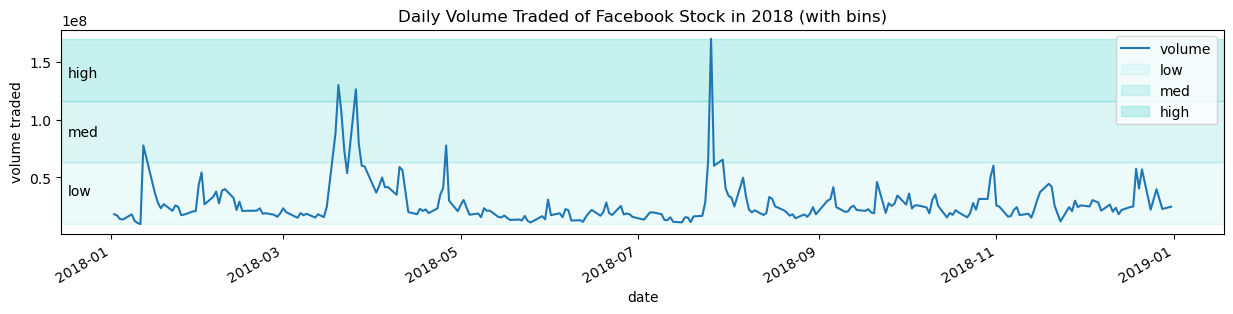

In [580]:
fb.plot(y='volume', figsize=(15, 3), title='Daily Volume Traded of Facebook Stock in 2018 (with bins)')
for bin_name, alpha, bounds in zip(
    ['low', 'med', 'high'], [0.1, 0.2, 0.3], pd.cut(fb.volume, bins=3).unique().categories.values
):
    plt.axhspan(bounds.left, bounds.right, alpha=alpha, label=bin_name, color='mediumturquoise')
    plt.annotate(bin_name, xy=('2017-12-17', (bounds.left + bounds.right)/2.1))
plt.ylabel('volume traded')
plt.legend()
plt.show()

In [582]:
volume_qbinned = pd.qcut(fb.volume, q=4, labels=['q1', 'q2', 'q3', 'q4'])
volume_qbinned.value_counts()

volume
q1    63
q2    63
q4    63
q3    62
Name: count, dtype: int64

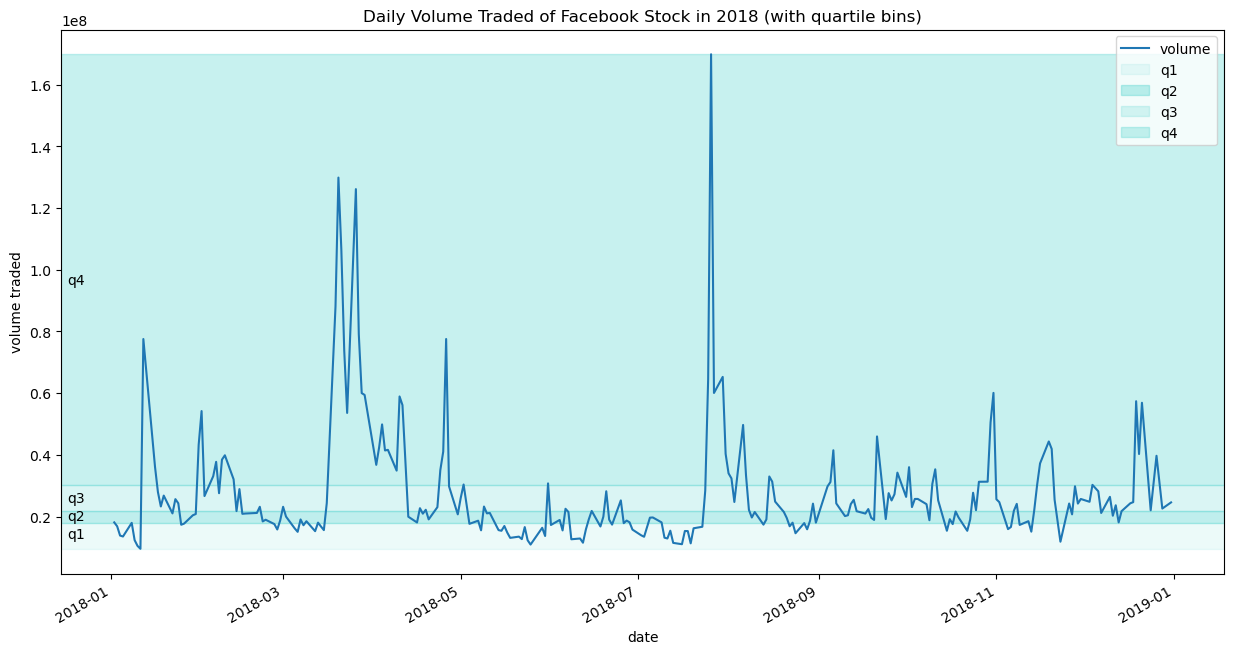

In [584]:
fb.plot(y='volume', figsize=(15, 8), title='Daily Volume Traded of Facebook Stock in 2018 (with quartile bins)')
for bin_name, alpha, bounds in zip(
['q1', 'q2', 'q3', 'q4'], [0.1, 0.35, 0.2, 0.3], pd.qcut(fb.volume, q=4).unique().categories.values
):
    plt.axhspan(bounds.left, bounds.right, alpha=alpha, label=bin_name, color='mediumturquoise')
    plt.annotate(bin_name, xy=('2017-12-17', (bounds.left + bounds.right)/2.1))
plt.ylabel('volume traded')
plt.legend()
plt.show()


In [588]:
central_park_weather = weather.query(
'station == "GHCND:USW00094728"'
).pivot(index='date', columns='datatype', values='value')
central_park_weather

datatype,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT06,WT08
date,,,,,,,,,,,,,,,
2018-01-01,3.5,0.0,0.0,0.0,-7.1,-13.8,300.0,300.0,6.7,11.2,NaN,NaN,NaN,NaN,NaN
2018-01-02,3.6,0.0,0.0,0.0,-3.2,-10.5,260.0,250.0,7.2,12.5,NaN,NaN,NaN,NaN,NaN
2018-01-03,1.4,0.0,0.0,0.0,-1.0,-8.8,260.0,270.0,6.3,9.8,NaN,NaN,NaN,NaN,NaN
2018-01-04,5.6,19.3,249.0,30.0,-1.6,-7.1,310.0,310.0,10.7,19.2,1.0,1.0,NaN,NaN,1.0
2018-01-05,5.8,0.0,0.0,180.0,-7.1,-12.7,280.0,280.0,9.4,15.7,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,NaN,0.0,0.0,0.0,6.7,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-28,NaN,29.2,0.0,0.0,15.6,6.1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2018-12-29,NaN,0.0,0.0,0.0,13.9,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [590]:
central_park_weather.SNOW.clip(0, 1).value_counts()

SNOW
0.0    354
1.0     11
Name: count, dtype: int64

In [600]:
oct_weather_z_scores = central_park_weather.loc['2018-10', ['TMIN', 'TMAX', 'PRCP']].apply(lambda x: x.sub(x.mean()).div(x.std()))
oct_weather_z_scores.describe().T
oct_weather_z_scores

datatype,TMIN,TMAX,PRCP
date,,,
2018-10-01,1.065152,1.203293,-0.394438
2018-10-02,1.255418,1.307830,1.951865
2018-10-03,1.065152,1.011643,-0.394438
2018-10-04,0.874887,1.203293,-0.260364
2018-10-05,0.788402,0.732879,-0.394438
2018-10-06,1.065152,0.436693,-0.394438
2018-10-07,1.445683,1.499480,-0.394438
2018-10-08,1.168933,1.011643,-0.394438
2018-10-09,1.359199,1.307830,-0.394438


In [602]:
oct_weather_z_scores.query('PRCP > 3')

datatype,TMIN,TMAX,PRCP
date,,,
2018-10-27,-0.751019,-1.201045,3.936167


In [604]:
central_park_weather.loc['2018-10', 'PRCP'].describe()

count    31.000000
mean      2.941935
std       7.458542
min       0.000000
25%       0.000000
50%       0.000000
75%       1.150000
max      32.300000
Name: PRCP, dtype: float64

In [608]:
import numpy as np
fb.apply(lambda x: np.vectorize(lambda y: len(str(np.ceil(y))))(x)).astype('int64').equals(fb.applymap(lambda x: len(str(np.ceil(x)))))

C:\Users\kurt\AppData\Local\Temp\ipykernel_14548\2876750886.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fb.apply(lambda x: np.vectorize(lambda y: len(str(np.ceil(y))))(x)).astype('int64').equals(fb.applymap(lambda x: len(str(np.ceil(x)))))


True

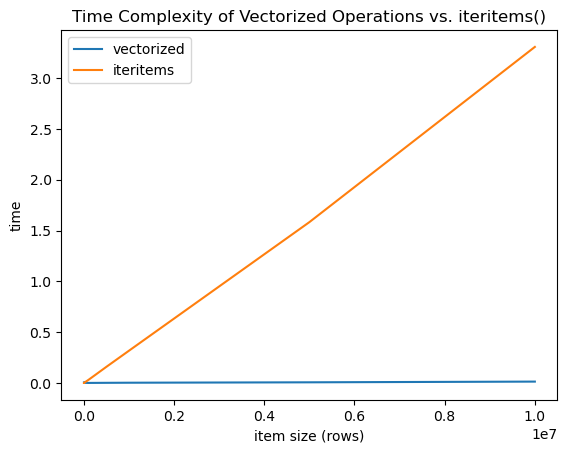

In [622]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(0)
vectorized_results = {}
iteritems_results = {}

for size in [10, 100, 1000, 10000, 100000, 500000, 1000000, 5000000, 10000000]:
    test = pd.Series(np.random.uniform(size=size))
    
    start = time.time()
    x = test + 10
    end = time.time()
    vectorized_results[size] = end - start
    
    start = time.time()
    x = []
    for i, v in test.items():
        x.append(v + 10)
    x = pd.Series(x)
    end = time.time()
    iteritems_results[size] = end - start
    
pd.DataFrame([pd.Series(vectorized_results, name='vectorized'), pd.Series(iteritems_results, name='iteritems')]).T.plot(title='Time Complexity of Vectorized Operations vs. iteritems()')
plt.xlabel('item size (rows)')
plt.ylabel('time')
plt.show()

<font size= 5>8.4 Aggregations</font>

In [628]:
import numpy as np
import pandas as pd
weather = pd.read_csv('weather_by_station.csv', index_col='date', parse_dates=True)
weather.head()


,datatype,station,value,station_name
date,,,,
2018-01-01,PRCP,GHCND:US1CTFR0039,0.0,"STAMFORD 4.2 S, CT US"
2018-01-01,PRCP,GHCND:US1NJBG0015,0.0,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0015,0.0,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,PRCP,GHCND:US1NJBG0017,0.0,"GLEN ROCK 0.7 SSE, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0017,0.0,"GLEN ROCK 0.7 SSE, NJ US"


In [632]:
fb = pd.read_csv('fb_2018.csv', index_col='date', parse_dates=True).assign(
trading_volume=lambda x: pd.cut(x.volume, bins=3, labels=['low', 'med', 'high'])
)
fb.head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low
2018-01-08,187.20,188.90,186.3300,188.28,17994726,low


In [634]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [640]:
fb.agg({
    'open': 'mean',
    'high': 'max',
    'low': 'min',
    'close': 'mean',
    'volume': 'sum'
})

open            171.45
high            218.62
low             123.02
close           171.51
volume   6949682394.00
dtype: float64

In [642]:
weather.query(
'station == "GHCND:USW00094728"'
).pivot(columns='datatype', values='value')[['SNOW', 'PRCP']].sum()

datatype
SNOW   1007.00
PRCP   1665.30
dtype: float64

In [644]:
weather.query(
'station == "GHCND:USW00094728"'
).pivot(columns='datatype', values='value')[['SNOW', 'PRCP']].agg('sum')

datatype
SNOW   1007.00
PRCP   1665.30
dtype: float64

In [646]:
fb.agg({
'open': 'mean',
'high': ['min', 'max'],
'low': ['min', 'max'],
'close': 'mean'
})

,open,high,low,close
mean,171.45,NaN,NaN,171.51
min,NaN,129.74,123.02,NaN
max,NaN,218.62,214.27,NaN


In [648]:
fb.groupby('trading_volume').mean()

C:\Users\kurt\AppData\Local\Temp\ipykernel_14548\46027550.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fb.groupby('trading_volume').mean()


,open,high,low,close,volume
trading_volume,,,,,
low,171.36,173.46,169.31,171.43,24547207.71
med,175.82,179.42,172.11,175.14,79072559.12
high,167.73,170.48,161.57,168.16,141924023.33


In [650]:
fb.groupby('trading_volume')['close'].agg(['min', 'max', 'mean'])

C:\Users\kurt\AppData\Local\Temp\ipykernel_14548\3607524933.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fb.groupby('trading_volume')['close'].agg(['min', 'max', 'mean'])


,min,max,mean
trading_volume,,,
low,124.06,214.67,171.43
med,152.22,217.50,175.14
high,160.06,176.26,168.16


In [652]:
fb_agg = fb.groupby('trading_volume').agg({
    'open': 'mean',
    'high': ['min', 'max'],
    'low': ['min', 'max'],
    'close': 'mean'
})
fb_agg

C:\Users\kurt\AppData\Local\Temp\ipykernel_14548\2667628102.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fb_agg = fb.groupby('trading_volume').agg({


open   high           low         close
                 mean    min    max    min    max   mean
trading_volume                                          
low            171.36 129.74 216.20 123.02 212.60 171.43
med            175.82 162.85 218.62 150.75 214.27 175.14
high           167.73 161.10 180.13 149.02 173.75 168.16

In [654]:
fb_agg.columns

MultiIndex([( 'open', 'mean'),
            ( 'high',  'min'),
            ( 'high',  'max'),
            (  'low',  'min'),
            (  'low',  'max'),
            ('close', 'mean')],
           )

In [656]:
fb_agg.columns = ['_'.join(col_agg) for col_agg in fb_agg.columns]
fb_agg.head()

,open_mean,high_min,high_max,low_min,low_max,close_mean
trading_volume,,,,,,
low,171.36,129.74,216.20,123.02,212.60,171.43
med,175.82,162.85,218.62,150.75,214.27,175.14
high,167.73,161.10,180.13,149.02,173.75,168.16


In [664]:
weather

,datatype,station,value,station_name
date,,,,
2018-01-01,PRCP,GHCND:US1CTFR0039,0.00,"STAMFORD 4.2 S, CT US"
2018-01-01,PRCP,GHCND:US1NJBG0015,0.00,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0015,0.00,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,PRCP,GHCND:US1NJBG0017,0.00,"GLEN ROCK 0.7 SSE, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0017,0.00,"GLEN ROCK 0.7 SSE, NJ US"
...,...,...,...,...
2018-12-31,WDF5,GHCND:USW00094789,130.00,"JFK INTERNATIONAL AIRPORT, NY US"
2018-12-31,WSF2,GHCND:USW00094789,9.80,"JFK INTERNATIONAL AIRPORT, NY US"
2018-12-31,WSF5,GHCND:USW00094789,12.50,"JFK INTERNATIONAL AIRPORT, NY US"


In [684]:
weather

,datatype,station,value,station_name
date,,,,
2018-01-01,PRCP,GHCND:US1CTFR0039,0.00,"STAMFORD 4.2 S, CT US"
2018-01-01,PRCP,GHCND:US1NJBG0015,0.00,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0015,0.00,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,PRCP,GHCND:US1NJBG0017,0.00,"GLEN ROCK 0.7 SSE, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0017,0.00,"GLEN ROCK 0.7 SSE, NJ US"
...,...,...,...,...
2018-12-31,WDF5,GHCND:USW00094789,130.00,"JFK INTERNATIONAL AIRPORT, NY US"
2018-12-31,WSF2,GHCND:USW00094789,9.80,"JFK INTERNATIONAL AIRPORT, NY US"
2018-12-31,WSF5,GHCND:USW00094789,12.50,"JFK INTERNATIONAL AIRPORT, NY US"


In [704]:
weather.loc['2018-10'].query('datatype == "PRCP"').resample('D').mean(numeric_only=True).head()



,value
date,
2018-10-01,0.01
2018-10-02,2.23
2018-10-03,19.69
2018-10-04,0.32
2018-10-05,0.97


In [702]:
weather.query('datatype == "PRCP"').groupby(
['station_name', pd.Grouper(freq='Q')]
).sum(numeric_only=True).unstack().sample(5, random_state=1)

C:\Users\kurt\AppData\Local\Temp\ipykernel_14548\1693347186.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  ['station_name', pd.Grouper(freq='Q')]


value                                 
date                        2018-03-31 2018-06-30 2018-09-30 2018-12-31
station_name                                                           
WANTAGH 1.1 NNE, NY US          279.90     216.80     472.50     277.20
STATEN ISLAND 1.4 SE, NY US     379.40     295.30     438.80     409.90
SYOSSET 2.0 SSW, NY US          323.50     263.30     355.50     459.90
STAMFORD 4.2 S, CT US           338.00     272.10     424.70     390.00
WAYNE TWP 0.8 SSW, NJ US        246.20     295.30     620.90     422.00

In [708]:
weather.groupby('station').filter( # station IDs with NY in them
lambda x: 'NY' in x.name
).query('datatype == "SNOW"').groupby('station_name').sum(numeric_only=True).squeeze()

station_name
ALBERTSON 0.2 SSE, NY US         1087.00
AMITYVILLE 0.1 WSW, NY US         434.00
AMITYVILLE 0.6 NNE, NY US        1072.00
ARMONK 0.3 SE, NY US             1504.00
BROOKLYN 3.1 NW, NY US            305.00
CENTERPORT 0.9 SW, NY US          799.00
ELMSFORD 0.8 SSW, NY US           863.00
FLORAL PARK 0.4 W, NY US         1015.00
HICKSVILLE 1.3 ENE, NY US         716.00
JACKSON HEIGHTS 0.3 WSW, NY US    107.00
LOCUST VALLEY 0.3 E, NY US          0.00
LYNBROOK 0.3 NW, NY US            325.00
MASSAPEQUA 0.9 SSW, NY US          41.00
MIDDLE VILLAGE 0.5 SW, NY US     1249.00
NEW HYDE PARK 1.6 NE, NY US         0.00
NEW YORK 8.8 N, NY US               0.00
NORTH WANTAGH 0.4 WSW, NY US      471.00
PLAINEDGE 0.4 WSW, NY US          610.00
PLAINVIEW 0.4 ENE, NY US         1360.00
SADDLE ROCK 3.4 WSW, NY US        707.00
STATEN ISLAND 1.4 SE, NY US       936.00
STATEN ISLAND 4.5 SSE, NY US       89.00
SYOSSET 2.0 SSW, NY US           1039.00
VALLEY STREAM 0.6 SE, NY US       898.00
WAN

In [714]:
weather.query('datatype == "PRCP"').groupby(
pd.Grouper(freq='D')
).mean(numeric_only= True).groupby(pd.Grouper(freq='M')).sum().value.nlargest()

C:\Users\kurt\AppData\Local\Temp\ipykernel_14548\845960387.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ).mean(numeric_only= True).groupby(pd.Grouper(freq='M')).sum().value.nlargest()


date
2018-11-30   210.59
2018-09-30   193.09
2018-08-31   192.45
2018-07-31   160.98
2018-02-28   158.11
Name: value, dtype: float64

In [718]:
weather.query('datatype == "PRCP"').rename(
dict(value='prcp'), axis=1
).groupby(pd.Grouper(freq='D')).mean(numeric_only = True).groupby(
pd.Grouper(freq='M')
).transform(np.sum)['2018-01-28':'2018-02-03']

C:\Users\kurt\AppData\Local\Temp\ipykernel_14548\344739851.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(freq='M')
C:\Users\kurt\AppData\Local\Temp\ipykernel_14548\344739851.py:5: FutureWarning: The provided callable <function sum at 0x00000264FFD5FB00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ).transform(np.sum)['2018-01-28':'2018-02-03']


,prcp
date,
2018-01-28,69.31
2018-01-29,69.31
2018-01-30,69.31
2018-01-31,69.31
2018-02-01,158.11
2018-02-02,158.11
2018-02-03,158.11


In [720]:
pd.crosstab(
index=fb.trading_volume,
columns=fb.index.month,
colnames=['month'],
values=fb.close,
aggfunc=np.mean
)

C:\Users\kurt\AppData\Local\Temp\ipykernel_14548\532444572.py:1: FutureWarning: The provided callable <function mean at 0x00000264FFD84C20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.crosstab(


month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,185.24,180.27,177.07,163.29,182.93,195.27,201.92,177.49,164.38,154.19,141.64,137.16
med,179.37,NaN,164.76,174.16,NaN,NaN,194.28,NaN,NaN,NaN,NaN,NaN
high,NaN,NaN,164.11,NaN,NaN,NaN,176.26,NaN,NaN,NaN,NaN,NaN


In [724]:
snow_data = weather.query('datatype == "SNOW"')
pd.crosstab(
    index=snow_data.station_name,
    columns=snow_data.index.month,
    colnames=['month'],
    values=snow_data.value,
    aggfunc=lambda x: (x > 0).sum(),
    margins=True, # show row and column subtotals
    margins_name='total observations of snow' # name the subtotals
)

month,1,2,3,4,5,6,7,8,9,10,11,12,total observations of snow
station_name,,,,,,,,,,,,,
"ALBERTSON 0.2 SSE, NY US",3.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,9
"AMITYVILLE 0.1 WSW, NY US",1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3
"AMITYVILLE 0.6 NNE, NY US",3.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8
"ARMONK 0.3 SE, NY US",6.00,4.00,6.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,23
"BLOOMINGDALE 0.7 SSE, NJ US",2.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WESTFIELD 0.6 NE, NJ US",3.00,0.00,4.00,1.00,0.00,NaN,0.00,0.00,0.00,NaN,1.00,NaN,9
"WOODBRIDGE TWP 1.1 ESE, NJ US",4.00,1.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,11
"WOODBRIDGE TWP 1.1 NNE, NJ US",2.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,7


<font size=  5>8.5 Time Series</font>

In [731]:
import numpy as np
import pandas as pd
fb = pd.read_csv('fb_2018.csv', index_col='date', parse_dates=True).assign(
trading_volume=lambda x: pd.cut(x.volume, bins=3, labels=['low', 'med', 'high'])
)
fb.head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903,low
2018-01-03,181.88,184.78,181.33,184.67,16886563,low
2018-01-04,184.90,186.21,184.10,184.33,13880896,low
2018-01-05,185.59,186.90,184.93,186.85,13574535,low
2018-01-08,187.20,188.90,186.33,188.28,17994726,low


In [733]:
fb['2018-10-11':'2018-10-15']

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-10-11,150.13,154.81,149.16,153.35,35338901,low
2018-10-12,156.73,156.89,151.30,153.74,25293492,low
2018-10-15,153.32,155.57,152.55,153.52,15433521,low


In [745]:
fb.loc['2018-q1'].equals(fb['2018-01':'2018-03'])

True

In [747]:
fb.first('1W')

C:\Users\kurt\AppData\Local\Temp\ipykernel_14548\2655357208.py:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  fb.first('1W')


,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903,low
2018-01-03,181.88,184.78,181.33,184.67,16886563,low
2018-01-04,184.90,186.21,184.10,184.33,13880896,low
2018-01-05,185.59,186.90,184.93,186.85,13574535,low


In [749]:
fb.last('1W')

C:\Users\kurt\AppData\Local\Temp\ipykernel_14548\2477606097.py:1: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  fb.last('1W')


,open,high,low,close,volume,trading_volume
date,,,,,,
2018-12-31,134.45,134.64,129.95,131.09,24625308,low


In [753]:
stock_data_per_minute = pd.read_csv(
'fb_week_of_may_20_per_minute.csv', index_col='date', parse_dates=True,
date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d %H-%M')
)
stock_data_per_minute.head()

C:\Users\kurt\AppData\Local\Temp\ipykernel_14548\3905469732.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  stock_data_per_minute = pd.read_csv(


,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.62,181.62,181.62,181.62,159049.00
2019-05-20 09:31:00,182.61,182.61,182.61,182.61,468017.00
2019-05-20 09:32:00,182.75,182.75,182.75,182.75,97258.00
2019-05-20 09:33:00,182.95,182.95,182.95,182.95,43961.00
2019-05-20 09:34:00,183.06,183.06,183.06,183.06,79562.00


In [755]:
stock_data_per_minute.groupby(pd.Grouper(freq='1D')).agg({
'open': 'first',
'high': 'max',
'low': 'min',
'close': 'last',
'volume': 'sum'
})

,open,high,low,close,volume
date,,,,,
2019-05-20,181.62,184.18,181.62,182.72,10044838.00
2019-05-21,184.53,185.58,183.97,184.82,7198405.00
2019-05-22,184.81,186.56,184.01,185.32,8412433.00
2019-05-23,182.50,183.73,179.76,180.87,12479171.00
2019-05-24,182.33,183.52,181.04,181.06,7686030.00


In [757]:
stock_data_per_minute.at_time('9:30')

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.62,181.62,181.62,181.62,159049.00
2019-05-21 09:30:00,184.53,184.53,184.53,184.53,58171.00
2019-05-22 09:30:00,184.81,184.81,184.81,184.81,41585.00
2019-05-23 09:30:00,182.50,182.50,182.50,182.50,121930.00
2019-05-24 09:30:00,182.33,182.33,182.33,182.33,52681.00


In [759]:
stock_data_per_minute.between_time('15:59', '16:00')


,open,high,low,close,volume
date,,,,,
2019-05-20 15:59:00,182.91,182.91,182.91,182.91,134569.00
2019-05-20 16:00:00,182.72,182.72,182.72,182.72,1113672.00
2019-05-21 15:59:00,184.84,184.84,184.84,184.84,61606.00
2019-05-21 16:00:00,184.82,184.82,184.82,184.82,801080.00
2019-05-22 15:59:00,185.29,185.29,185.29,185.29,96099.00
2019-05-22 16:00:00,185.32,185.32,185.32,185.32,1220993.00
2019-05-23 15:59:00,180.72,180.72,180.72,180.72,109648.00
2019-05-23 16:00:00,180.87,180.87,180.87,180.87,1329217.00
2019-05-24 15:59:00,181.07,181.07,181.07,181.07,52994.00


In [765]:
shares_traded_in_first_30_min = stock_data_per_minute\
    .between_time('9:30', '10:00')\
    .groupby(pd.Grouper(freq='1D'))\
    .filter(lambda x: (x.volume > 0).all())\
    .volume.mean()
shares_traded_in_last_30_min = stock_data_per_minute\
    .between_time('15:30', '16:00')\
    .groupby(pd.Grouper(freq='1D'))\
    .filter(lambda x: (x.volume > 0).all())\
    .volume.mean()
shares_traded_in_first_30_min - shares_traded_in_last_30_min

18592.967741935485

In [763]:
pd.DataFrame(dict(before=stock_data_per_minute.index, after=stock_data_per_minute.index.normalize())).head()

,before,after
0,2019-05-20 09:30:00,2019-05-20
1,2019-05-20 09:31:00,2019-05-20
2,2019-05-20 09:32:00,2019-05-20
3,2019-05-20 09:33:00,2019-05-20
4,2019-05-20 09:34:00,2019-05-20


In [767]:
stock_data_per_minute.index.to_series().dt.normalize().head()

date
2019-05-20 09:30:00   2019-05-20
2019-05-20 09:31:00   2019-05-20
2019-05-20 09:32:00   2019-05-20
2019-05-20 09:33:00   2019-05-20
2019-05-20 09:34:00   2019-05-20
Name: date, dtype: datetime64[ns]

In [769]:
fb.assign(
    prior_close=lambda x: x.close.shift(),
    after_hours_change_in_price=lambda x: x.open - x.prior_close,
    abs_change=lambda x: x.after_hours_change_in_price.abs()
).nlargest(5, 'abs_change')

,open,high,low,close,volume,trading_volume,prior_close,after_hours_change_in_price,abs_change
date,,,,,,,,,
2018-07-26,174.89,180.13,173.75,176.26,169803668,high,217.50,-42.61,42.61
2018-04-26,173.22,176.27,170.80,174.16,77556934,med,159.69,13.53,13.53
2018-01-12,178.06,181.48,177.40,179.37,77551299,med,187.77,-9.71,9.71
2018-10-31,155.00,156.40,148.96,151.79,60101251,low,146.22,8.78,8.78
2018-03-19,177.01,177.17,170.06,172.56,88140060,med,185.09,-8.08,8.08


In [771]:
pd.date_range('2018-01-01', freq='D', periods=5) + pd.Timedelta('9 hours 30 minutes')

DatetimeIndex(['2018-01-01 09:30:00', '2018-01-02 09:30:00',
               '2018-01-03 09:30:00', '2018-01-04 09:30:00',
               '2018-01-05 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [775]:
fb.loc['2018-09'].first_valid_index()

Timestamp('2018-09-04 00:00:00')

In [777]:
fb.loc['2018-09'].last_valid_index()

Timestamp('2018-09-28 00:00:00')

In [789]:
fb.asof('2018-09-30')

open                168.33
high                168.79
low                 162.56
close               164.46
volume            34265638
trading_volume         low
Name: 2018-09-30 00:00:00, dtype: object

In [791]:
(
fb.drop(columns='trading_volume')
- fb.drop(columns='trading_volume').shift()
).equals(
fb.drop(columns='trading_volume').diff()
)

True

In [793]:
fb.drop(columns='trading_volume').diff().head()

,open,high,low,close,volume
date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,4.20,3.20,3.78,3.25,-1265340.00
2018-01-04,3.02,1.43,2.77,-0.34,-3005667.00
2018-01-05,0.69,0.69,0.83,2.52,-306361.00
2018-01-08,1.61,2.00,1.40,1.43,4420191.00


In [795]:
fb.drop(columns='trading_volume').diff(-3).head()

,open,high,low,close,volume
date,,,,,
2018-01-02,-7.91,-5.32,-7.38,-5.43,4577368.00
2018-01-03,-5.32,-4.12,-5.00,-3.61,-1108163.00
2018-01-04,-3.80,-2.59,-3.00,-3.54,1487839.00
2018-01-05,-1.35,-0.99,-0.70,-0.99,3044641.00
2018-01-08,-1.20,0.50,-1.05,0.51,8406139.00


In [797]:
import matplotlib.pyplot as plt


C:\Users\kurt\AppData\Local\Temp\ipykernel_14548\3181351508.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  index = pd.date_range('2018-01-01', freq='T', periods=365*24*60)


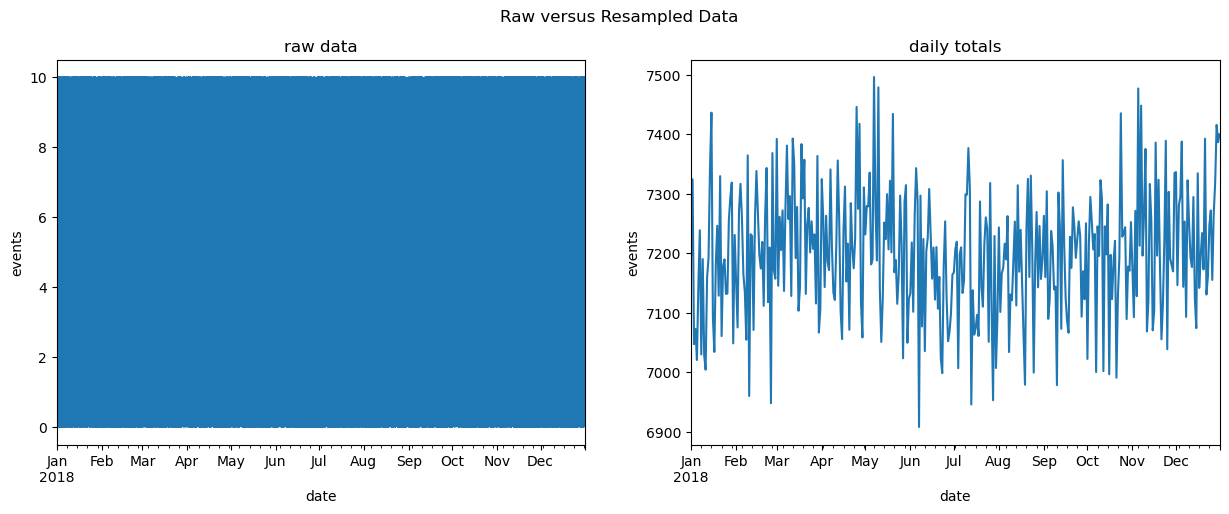

In [801]:
np.random.seed(0)
index = pd.date_range('2018-01-01', freq='T', periods=365*24*60)
raw = pd.DataFrame(
np.random.uniform(0, 10, size=index.shape[0]), index=index
)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
raw.plot(legend=False, ax=axes[0], title='raw data')
raw.resample('1D').sum().plot(legend=False, ax=axes[1], title='daily totals')
for ax in axes:
    ax.set_xlabel('date')
    ax.set_ylabel('events')
plt.suptitle('Raw versus Resampled Data')
plt.show()


In [803]:
stock_data_per_minute.head()

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.62,181.62,181.62,181.62,159049.00
2019-05-20 09:31:00,182.61,182.61,182.61,182.61,468017.00
2019-05-20 09:32:00,182.75,182.75,182.75,182.75,97258.00
2019-05-20 09:33:00,182.95,182.95,182.95,182.95,43961.00
2019-05-20 09:34:00,183.06,183.06,183.06,183.06,79562.00


In [805]:
stock_data_per_minute.resample('1D').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})

,open,high,low,close,volume
date,,,,,
2019-05-20,181.62,184.18,181.62,182.72,10044838.00
2019-05-21,184.53,185.58,183.97,184.82,7198405.00
2019-05-22,184.81,186.56,184.01,185.32,8412433.00
2019-05-23,182.50,183.73,179.76,180.87,12479171.00
2019-05-24,182.33,183.52,181.04,181.06,7686030.00


In [817]:
fb.resample('Q').mean(numeric_only=  True)

C:\Users\kurt\AppData\Local\Temp\ipykernel_14548\2095663147.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  fb.resample('Q').mean(numeric_only=  True)


,open,high,low,close,volume
date,,,,,
2018-03-31,179.47,181.79,177.04,179.55,32926396.70
2018-06-30,180.37,182.28,178.60,180.70,24055317.75
2018-09-30,180.81,182.89,178.96,181.03,27019824.76
2018-12-31,145.27,147.62,142.72,144.87,26974331.73


In [809]:
fb.drop(columns='trading_volume').resample('Q').apply(
lambda x: x.last('1D').values - x.first('1D').values
)

C:\Users\kurt\AppData\Local\Temp\ipykernel_14548\2299715798.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  fb.drop(columns='trading_volume').resample('Q').apply(
C:\Users\kurt\AppData\Local\Temp\ipykernel_14548\2299715798.py:2: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  lambda x: x.last('1D').values - x.first('1D').values
C:\Users\kurt\AppData\Local\Temp\ipykernel_14548\2299715798.py:2: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  lambda x: x.last('1D').values - x.first('1D').values
C:\Users\kurt\AppData\Local\Temp\ipykernel_14548\2299715798.py:2: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  lambda x: x.last('1D').values - x.first('1D').values
C:\Users\kurt\AppData\Local\Te

date
2018-03-31    [[-22.53, -20.160000000000025, -23.41000000000...
2018-06-30    [[39.50999999999999, 38.399700000000024, 39.84...
2018-09-30    [[-25.039999999999992, -28.659999999999997, -2...
2018-12-31    [[-28.580000000000013, -31.24000000000001, -31...
Freq: QE-DEC, dtype: object

In [823]:
melted_stock_data = pd.read_csv('melted_stock_data.csv', index_col='date', parse_dates=True)
melted_stock_data.head()

,price
date,
2019-05-20 09:30:00,181.62
2019-05-20 09:31:00,182.61
2019-05-20 09:32:00,182.75
2019-05-20 09:33:00,182.95
2019-05-20 09:34:00,183.06


In [825]:
melted_stock_data.resample('1D').ohlc()['price']

,open,high,low,close
date,,,,
2019-05-20,181.62,184.18,181.62,182.72
2019-05-21,184.53,185.58,183.97,184.82
2019-05-22,184.81,186.56,184.01,185.32
2019-05-23,182.50,183.73,179.76,180.87
2019-05-24,182.33,183.52,181.04,181.06


In [827]:
fb.resample('6H').asfreq().head()

C:\Users\kurt\AppData\Local\Temp\ipykernel_14548\2962105639.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fb.resample('6H').asfreq().head()


,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903.00,low
2018-01-02 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563.00,low


In [833]:
fb.resample('6H').asfreq().assign(
    volume=lambda x: x.volume.fillna(0), # put 0 when market is closed
    close=lambda x: x.close.fillna(method='ffill'), # carry forward
    # take the closing price if these aren't available
    open=lambda x: np.where(x.open.isnull(), x.close, x.open),
    high=lambda x: np.where(x.high.isnull(), x.close, x.high),
    low=lambda x: np.where(x.low.isnull(), x.close, x.low)
).head()

C:\Users\kurt\AppData\Local\Temp\ipykernel_14548\3797486500.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fb.resample('6H').asfreq().assign(
C:\Users\kurt\AppData\Local\Temp\ipykernel_14548\3797486500.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  close=lambda x: x.close.fillna(method='ffill'), # carry forward


,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903.00,low
2018-01-02 06:00:00,181.42,181.42,181.42,181.42,0.00,NaN
2018-01-02 12:00:00,181.42,181.42,181.42,181.42,0.00,NaN
2018-01-02 18:00:00,181.42,181.42,181.42,181.42,0.00,NaN
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563.00,low


In [ ]:
import sqlite3
with sqlite3.connect('data/stocks.db') as connection:
    fb_prices = pd.read_sql(
        'SELECT * FROM fb_prices', connection,
        index_col='date', parse_dates=['date']
    )
    aapl_prices = pd.read_sql(
        'SELECT * FROM aapl_prices', connection,
        index_col='date', parse_dates=['date']
    )

<font size =5 ><b>8.1.4 Data Analysis<b></font><br>
Provide some comments here about the results of the procedures.

<font size =5 ><b>8.1.5 Supplementary Activity<b></font>

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

<font size= 5>EXTRACTION PHASE</font>

In [38]:
import pandas  as pd
import numpy as np
import datetime
df1 = pd.read_csv('earthquakes.csv')
df2 = pd.read_csv('faang.csv')

<font size = 5>TRANSFORMATION PHASE</font>

In [42]:
# BEFORE WE  START WITH THE ANALYSIS LETS FIRST CHECK IF OUR DATA HAS ISSUES

df1.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


In [44]:
df2.head()

,ticker,date,open,high,low,close,volume
0,FB,2018-01-02,177.68,181.58,177.5500,181.42,18151903
1,FB,2018-01-03,181.88,184.78,181.3300,184.67,16886563
2,FB,2018-01-04,184.90,186.21,184.0996,184.33,13880896
3,FB,2018-01-05,185.59,186.90,184.9300,186.85,13574535
4,FB,2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [50]:
# Check If there are missing values

print(f'DATAFRAME1: {df1.isnull().sum()}')
print('============================================')
print(f'DATAFRAME2: {df2.isnull().sum()}')

#BASE ON THE OUTPUT THE DATAFRAME 1 HAS 1 ROW THAT HAS NULL VALUES IG we are just going to remove it

DATAFRAME1: mag             1
magType         1
time            0
place           0
tsunami         0
parsed_place    0
dtype: int64
DATAFRAME2: ticker    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [58]:
df1.dropna(inplace = True)
df1.isnull().sum()
#BASE ON THE OUTPUT WE ARE GOOD TO GO

mag             0
magType         0
time            0
place           0
tsunami         0
parsed_place    0
dtype: int64

In [62]:
# HOW ABOUT CHECKING THEIR DATATYPES

print(f'DATAFRAME1: {df1.dtypes}')
print('============================================')
print(f'DATAFRAME2: {df2.dtypes}')

# BASE ON THE OUTPUT the data in dataframe 2 is not converted into datetime datatype

DATAFRAME1: mag             float64
magType          object
time              int64
place            object
tsunami           int64
parsed_place     object
dtype: object
DATAFRAME2: ticker     object
date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object


In [66]:
# CHANGING THE Dtype of dataframe2 date

df2['date'] = pd.to_datetime(df2['date'])
df2.dtypes

ticker            object
date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
dtype: object

In [84]:
#CHECKING FOR DUPLICATES

print(f'DATAFRAME1 : {df1.duplicated().any()}')
print('==========================================')
print(f'DATAFRAME2: {df2.duplicated().any()}')

DATAFRAME1 : False
DATAFRAME2: False


In [ ]:
# IG THERE ARE JUST MINIMAL ISSUES WITH OUR DATA ITHINK I WILL START THE SUPPLEMENTARY ACTIVITY

<font size = 5>LOAD PHASE</font>

1. With the earthquakes.csv file, select all the earthquakes in Japan with a magType of mb and a magnitude of 4.9 or greater.

In [92]:
# For number 1 i will use query to select all rows that will satisfy the condition

japan_quake = df1.query('magType == "mb" & mag >= 4.9')
japan_quake

,mag,magType,time,place,tsunami,parsed_place
227,5.2,mb,1539389603790,"15km WSW of Pisco, Peru",0,Peru
229,4.9,mb,1539389546300,"193km N of Qulansiyah, Yemen",0,Yemen
248,4.9,mb,1539382925190,"151km S of Severo-Kuril'sk, Russia",0,Russia
258,5.1,mb,1539380306940,"236km NNW of Kuril'sk, Russia",0,Russia
391,5.1,mb,1539337221080,Pacific-Antarctic Ridge,0,Pacific-Antarctic Ridge
...,...,...,...,...,...,...
9154,4.9,mb,1537268270010,Southwest Indian Ridge,0,Southwest Indian Ridge
9175,5.2,mb,1537262729590,"126km N of Dili, East Timor",1,East Timor
9176,5.2,mb,1537262656830,"90km S of Raoul Island, New Zealand",0,New Zealand
9213,5.1,mb,1537255481060,South of Tonga,0,Tonga


2. Create bins for each full number of magnitude (for example, the first bin is 0-1, the second is 1-2, and so on) with a magType of ml and count how many are in each bin. 


In [115]:
# before use the cut we first create a bins range

bin_range = [x for x in range(int(df1['mag'].min()),int(df1['mag'].max())+ 2)]
bin_range
bin_text = [str(x) for x in bin_range]

# now that we created bins and bin labels we can use the cut function and insert it into the new column
 
df1['quake bins'] = pd.cut(df1['mag'],bin_range, bin_text)

df1.head()
# Now base on the output we do the groupings to count every values into our bins

,mag,magType,time,place,tsunami,parsed_place,quake bins
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California,"(1, 2]"
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California,"(1, 2]"
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California,"(3, 4]"
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California,"(0, 1]"
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California,"(2, 3]"


In [121]:
df1.groupby(['quake bins'])['mag'].count()
# now we got the result

C:\Users\kurt\AppData\Local\Temp\ipykernel_14548\1089677699.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby(['quake bins'])['mag'].count()


quake bins
(-1, 0]     525
(0, 1]     2941
(1, 2]     3802
(2, 3]     1157
(3, 4]      233
(4, 5]      534
(5, 6]      117
(6, 7]        7
(7, 8]        1
Name: mag, dtype: int64

3. Using the faang.csv file, group by the ticker and resample to monthly frequency. Make the following aggregations:
- Mean of the opening price
- Maximum of the high price
- Minimum of the low price
- Mean of the closing price
- Sum of the volume traded

In [ ]:
# Before we do the resampling we should set the date as our index

df2.set_index('date', inplace = True)

In [130]:
# base on the output we successfully change the index into date
df2.head()

,ticker,open,high,low,close,volume
date,,,,,,
2018-01-02,FB,177.68,181.58,177.5500,181.42,18151903
2018-01-03,FB,181.88,184.78,181.3300,184.67,16886563
2018-01-04,FB,184.90,186.21,184.0996,184.33,13880896
2018-01-05,FB,185.59,186.90,184.9300,186.85,13574535
2018-01-08,FB,187.20,188.90,186.3300,188.28,17994726


In [136]:
# now we proceed to the groupby by ticker and the resample per 1month and aside from that we will use aggregate to get the required output

df2.groupby(['ticker']).resample('ME').agg({
    'open':'mean',
    'high':'max',
    'low': 'min',
    'close':'mean',
    'volume':'sum'
    
})

open       high        low        close     volume
ticker date                                                                 
AAPL   2018-01-31   170.714690   176.6782   161.5708   170.699271  659679440
       2018-02-28   164.562753   177.9059   147.9865   164.921884  927894473
       2018-03-31   172.421381   180.7477   162.4660   171.878919  713727447
       2018-04-30   167.332895   176.2526   158.2207   167.286924  666360147
       2018-05-31   182.635582   187.9311   162.7911   183.207418  620976206
       2018-06-30   186.605843   192.0247   178.7056   186.508652  527624365
       2018-07-31   188.065786   193.7650   181.3655   188.179724  393843881
       2018-08-31   210.460287   227.1001   195.0999   211.477743  700318837
       2018-09-30   220.611742   227.8939   213.6351   220.356353  678972040
       2018-10-31   219.489426   231.6645   204.4963   219.137822  789748068
       2018-11-30   190.828681   220.6405   169.5328   190.246652  961321947
       2018-12-31   164.537405   184.1501   145.9639   163.564732  898917007
AMZN   2018-01-31  1301.377143  1472.5800  1170.5100  1309.010952   96371290
       2018-02-28  1447.112632  1528.7000  1265.9300  1442.363158  137784020
       2018-03-31  1542.160476  1617.5400  1365.2000  1540.367619  130400151
       2018-04-30  1475.841905  1638.1000  1352.8800  1468.220476  129945743
       2018-05-31  1590.474545  1635.0000  1546.0200  1594.903636   71615299
       2018-06-30  1699.088571  1763.1000  1635.0900  1698.823810   85941510
       2018-07-31  1786.305714  1880.0500  1678.0600  1784.649048   97629820
       2018-08-31  1891.957826  2025.5700  1776.0200  1897.851304   96575676
       2018-09-30  1969.239474  2050.5000  1865.0000  1966.077895   94445693
       2018-10-31  1799.630870  2033.1900  1476.3600  1782.058261  183228552
       2018-11-30  1622.323810  1784.0000  1420.0000  1625.483810  139290208
       2018-12-31  1572.922105  1778.3400  1307.0000  1559.443158  154812304
FB     2018-01-31   184.364762   190.6600   175.8000   184.962857  495655736
       2018-02-28   180.721579   195.3200   167.1800   180.269474  516621991
       2018-03-31   173.449524   186.1000   149.0200   173.489524  996232472
       2018-04-30   164.163557   177.1000   150.5100   163.810476  751130388
       2018-05-31   181.910509   192.7200   170.2300   182.930000  401144183
       2018-06-30   194.974067   203.5500   186.4300   195.267619  387265765
       2018-07-31   199.332143   218.6200   166.5600   199.967143  652763259
       2018-08-31   177.598443   188.3000   170.2700   177.491957  549016789
       2018-09-30   164.232895   173.8900   158.8656   164.377368  500468912
       2018-10-31   154.873261   165.8800   139.0300   154.187826  622446235
       2018-11-30   141.762857   154.1300   126.8500   141.635714  518150415
       2018-12-31   137.529474   147.1900   123.0200   137.161053  558786249
GOOG   2018-01-31  1127.200952  1186.8900  1045.2300  1130.770476   28738485
       2018-02-28  1088.629474  1174.0000   992.5600  1088.206842   42384105
       2018-03-31  1096.108095  1177.0500   980.6400  1091.490476   45430049
       2018-04-30  1038.415238  1094.1600   990.3700  1035.696190   41773275
       2018-05-31  1064.021364  1110.7500  1006.2900  1069.275909   31849196
       2018-06-30  1136.396190  1186.2900  1096.0100  1137.626667   32103642
       2018-07-31  1183.464286  1273.8900  1093.8000  1187.590476   31953386
       2018-08-31  1226.156957  1256.5000  1188.2400  1225.671739   28820379
       2018-09-30  1176.878421  1212.9900  1146.9100  1175.808947   28863199
       2018-10-31  1116.082174  1209.9600   995.8300  1110.940435   48496167
       2018-11-30  1054.971429  1095.5700   996.0200  1056.162381   36735570
       2018-12-31  1042.620000  1124.6500   970.1100  1037.420526   40256461
NFLX   2018-01-31   231.269286   286.8100   195.4200   232.908095  238377533
       2018-02-28   270.873158   297.3600   236.1100   271.443684  184585819
       2018-03-31   31

4. Build a crosstab with the earthquake data between the tsunami column and the magType column. Rather than showing the frequency count, show the maximum

In [145]:
# Here after we use crosstab we can identify 
# what must be the magnitude of the earth quake for us to expect an tsunami

cross_tabs = pd.crosstab(df1['tsunami'],df1['magType'],values = df1['mag'],aggfunc = ['max'])

cross_tabs

max                                                 
magType   mb mb_lg    md   mh   ml ms_20    mw  mwb  mwr  mww
tsunami                                                      
0        5.6   3.5  4.11  1.1  4.2   NaN  3.83  5.8  4.8  6.0
1        6.1   NaN   NaN  NaN  5.1   5.7  4.41  NaN  NaN  7.5

3. Calculate the rolling 60-day aggregations of OHLC data by ticker for the FAANG data. Use the same aggregations as exercise no. 3.

In [157]:
# Using the rolling function we can do a window calculation, basically we are checking what happened within the 
# 60 day window and we check it forward day by day.
roll_60 = df2.groupby(['ticker']).rolling('60D').agg({
    'open':'mean',
    'high':'max',
    'low': 'min',
    'close':'mean',
    'volume':'sum'
    
})
roll_60

open      high       low       close       volume
ticker date                                                               
AAPL   2018-01-02  166.927100  169.0264  166.0442  168.987200   25555934.0
       2018-01-03  168.089600  171.2337  166.0442  168.972500   55073833.0
       2018-01-04  168.480367  171.2337  166.0442  169.229200   77508430.0
       2018-01-05  168.896475  172.0381  166.0442  169.840675  101168448.0
       2018-01-08  169.324680  172.2736  166.0442  170.080040  121736214.0
...                       ...       ...       ...         ...          ...
NFLX   2018-12-24  283.509250  332.0499  233.6800  281.931750  525657894.0
       2018-12-26  281.844500  332.0499  231.2300  280.777750  520444588.0
       2018-12-27  281.070488  332.0499  231.2300  280.162805  532679805.0
       2018-12-28  279.916341  332.0499  231.2300  279.461341  521968250.0
       2018-12-31  278.430769  332.0499  231.2300  277.451410  476309676.0

[1255 rows x 5 columns]

6. Create a pivot table of the FAANG data that compares the stocks. Put the ticker in the rows and show the averages of the OHLC and volume traded data.

In [172]:
# After we use the pivot table by gett the average of OHLC and volume per company
# with this information we can compare how company has the highest average closing price and other
pivot_table = df2.pivot_table(index = df2['ticker'], values = df2[['open','high','low','close','volume']], aggfunc = ['mean'])
pivot_table

mean                                                     
              close         high          low         open        volume
ticker                                                                  
AAPL     186.986218   188.906858   185.135729   187.038674  3.402145e+07
AMZN    1641.726175  1662.839801  1619.840398  1644.072669  5.649563e+06
FB       171.510936   173.615298   169.303110   171.454424  2.768798e+07
GOOG    1113.225139  1125.777649  1101.001594  1113.554104  1.742645e+06
NFLX     319.290299   325.224583   313.187273   319.620533  1.147030e+07

7. Calculate the Z-scores for each numeric column of Netflix's data (ticker is NFLX) using apply().

In [182]:
# Before we apply the zscore we must get the data of the netflix company by performing query

NTFLX = df2.query('ticker == "NFLX"')
NTFLX

,ticker,open,high,low,close,volume
date,,,,,,
2018-01-02,NFLX,196.10,201.6500,195.4200,201.070,10966889
2018-01-03,NFLX,202.05,206.2100,201.5000,205.050,8591369
2018-01-04,NFLX,206.20,207.0500,204.0006,205.630,6029616
2018-01-05,NFLX,207.25,210.0200,205.5900,209.990,7033240
2018-01-08,NFLX,210.02,212.5000,208.4400,212.050,5580178
...,...,...,...,...,...,...
2018-12-24,NFLX,242.00,250.6500,233.6800,233.880,9547616
2018-12-26,NFLX,233.92,254.5000,231.2300,253.670,14402735
2018-12-27,NFLX,250.11,255.5900,240.1000,255.565,12235217


In [186]:
# NOW WE USE APPLY function and apply the formula to change the values of every row into zscore

columns = ['open','high','low','close','volume']

NTFLX[columns] = NTFLX[columns].apply(lambda x: (x - x.mean())/x.std())

NTFLX

C:\Users\kurt\AppData\Local\Temp\ipykernel_14548\3233923423.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NTFLX[columns] = NTFLX[columns].apply(lambda x: (x - x.mean())/x.std())


,ticker,open,high,low,close,volume
date,,,,,,
2018-01-02,NFLX,-2.500753,-2.516023,-2.410226,-2.416644,-0.088760
2018-01-03,NFLX,-2.380291,-2.423180,-2.285793,-2.335286,-0.507606
2018-01-04,NFLX,-2.296272,-2.406077,-2.234616,-2.323429,-0.959287
2018-01-05,NFLX,-2.275014,-2.345607,-2.202087,-2.234303,-0.782331
2018-01-08,NFLX,-2.218934,-2.295113,-2.143759,-2.192192,-1.038531
...,...,...,...,...,...,...
2018-12-24,NFLX,-1.571478,-1.518366,-1.627197,-1.745946,-0.339003
2018-12-26,NFLX,-1.735063,-1.439978,-1.677339,-1.341402,0.517040
2018-12-27,NFLX,-1.407286,-1.417785,-1.495805,-1.302664,0.134868


8. Add event descriptions:
- Create a dataframe with the following three columns: ticker, date, and event. The columns should have the following values:
    - ticker: 'FB'
    - date: ['2018-07-25', '2018-03-19', '2018-03-20']
    - event: ['Disappointing user growth announced after close.', 'Cambridge Analytica story', 'FTC investigation']
- Set the index to ['date', 'ticker']
- Merge this data with the FAANG data using an outer join

In [214]:
# for this number we must create a new dataframe using the given data


df3 = {
    'ticker':'FB',
    'date':['2018-07-25', '2018-03-19', '2018-03-20'],
    'event':['Disappointing user growth announced after close.', 'Cambridge Analytica story', 'FTC investigation']
}

# Now we successsfully created a new dataframe
df3 = pd.DataFrame(df3)
# since the are no datatypes after creating dataframe we must set it first before turning it into index

df3['date'] = pd.to_datetime(df3['date'])
# we set index of date and ticker into dataframe3
df3.set_index(['date','ticker'], inplace = True)

df3

,,event
date,ticker,
2018-07-25,FB,Disappointing user growth announced after close.
2018-03-19,FB,Cambridge Analytica story
2018-03-20,FB,FTC investigation


In [232]:
# NOW THAT WE CREATED A NEW DATAFRAME WE ARE GOING TO MERGE IT INTO OUR ORIGNAL DATAFRAME USING OUTER
# SINCE WE ARE TALKING ABOUT EVENT IT DOESNT MATTER IF THERE ARE ROWS THAT HAS NULL VALUES SINCE WE DONT HAVE INFORMATION
# ABOUT OTHER COMPANIES DURING THAT DATE

merge_df = df2.merge(df3, on = ['date','ticker'], how = 'outer')
merge_df = merge_df.sort_index()

merge_df.loc[['2018-07-25','2018-03-19','2018-03-20']]

,ticker,open,high,low,close,volume,event
date,,,,,,,
2018-07-25,AAPL,190.8977,192.6675,190.2746,192.6378,16826483,NaN
2018-07-25,AMZN,1829.3000,1863.8400,1822.6400,1863.6100,3836333,NaN
2018-07-25,FB,215.7150,218.6200,214.2700,217.5000,64592585,Disappointing user growth announced after close.
2018-07-25,GOOG,1239.1300,1265.8600,1239.1300,1263.7000,2139999,NaN
2018-07-25,NFLX,357.5700,363.2800,355.6500,362.8700,8516248,NaN
2018-03-19,AAPL,174.6604,174.8081,171.0553,172.6707,33446771,NaN
2018-03-19,AMZN,1554.5300,1561.6600,1525.3500,1544.9300,6580766,NaN
2018-03-19,FB,177.0100,177.1700,170.0600,172.5600,88140060,Cambridge Analytica story
2018-03-19,GOOG,1120.0100,1121.9900,1089.0100,1099.8200,2805937,NaN


In [234]:
df2

,ticker,open,high,low,close,volume
date,,,,,,
2018-01-02,FB,177.68,181.58,177.5500,181.42,18151903
2018-01-03,FB,181.88,184.78,181.3300,184.67,16886563
2018-01-04,FB,184.90,186.21,184.0996,184.33,13880896
2018-01-05,FB,185.59,186.90,184.9300,186.85,13574535
2018-01-08,FB,187.20,188.90,186.3300,188.28,17994726
...,...,...,...,...,...,...
2018-12-24,GOOG,973.90,1003.54,970.1100,976.22,1590328
2018-12-26,GOOG,989.01,1040.00,983.0000,1039.46,2373270
2018-12-27,GOOG,1017.15,1043.89,997.0000,1043.88,2109777


Use the transform() method on the FAANG data to represent all the values in terms of the first date in the data. To do so, divide all the values for each ticker by the values
for the first date in the data for that ticker. This is referred to as an index, and the data for the first date is the base (https://ec.europa.eu/eurostat/statistics-explained/
index.php/ Beginners:Statisticalconcept-Indexandbaseyear). When data is in this format, we can easily see growth over time. Hint: transform() can take a function name.

In [250]:
# I create a copy from the original dataframe Incase that I made mistake which might overite the whole dataframe
copyy = merge_df.copy()

In [255]:
# In this case I need to create a columns variable to avoid columnns redunduncy
columns = ['open','high','low','close','volume']

# The technique that i did here is to group it by ticker and use the transform by dividing each data by the values of the first date
# With this information we can monitor the growth of each companies over the years by percentage of course ehhehehehee
copyy.groupby(['ticker'])[columns].transform(lambda x: x/x.iloc[0])

,open,high,low,close,volume
date,,,,,
2018-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2018-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2018-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2018-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2018-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...
2018-12-31,0.945640,0.938785,0.938375,0.929457,1.369681
2018-12-31,1.289078,1.277950,1.270386,1.263211,2.581007
2018-12-31,0.756697,0.741491,0.731907,0.722577,1.356624
